In [1]:
%%HTML
<style>
    body {
        --vscode-font-family: "LXGW WenKai";
        line-height: 2; Í
    }
</style>

# Before Start
- Please setup the cluster with the following configuration:
    - Python: 3.8
    - Spark: 3.5.0 
    - Local Mode 

In [1]:
import os 
import findspark 


import pyspark
# for sql
from pyspark.sql import SparkSession 
from pyspark.sql.functions import col
from pyspark.sql.functions import sum,avg,max,count
from pyspark import SparkContext

# for time 
import time 
import datetime as dt
from pyspark.sql import functions as F
import psutil

In [2]:
test1 = "../data/task1.csv"
test2 = "../data/task2.csv"
test3 = "../data/task3.csv"
test4 = "../../data/task4.csv"
test5 = "../../data/task5.csv"
test6 = "../../data/task6.csv"
test7 = "../../data/task7.csv"

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .config("spark.driver.cores",16) \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()

# Data Scalability
This section aims to explore the following questions:
- What happens when the amount of data increases in the orders of magnitude (1x/10x/100x... or 2x/4x/8x/16x/...)?


We set Spark in local mode. There aren't multiple nodes in a cluster. Everything runs in a single JVM (Java Virtual Machine) on our machine. 

## Test 1 is 1,000 rows data


In [5]:
# Read CSV file
df_test1 = spark.read.csv(test1, header=True, inferSchema=True)

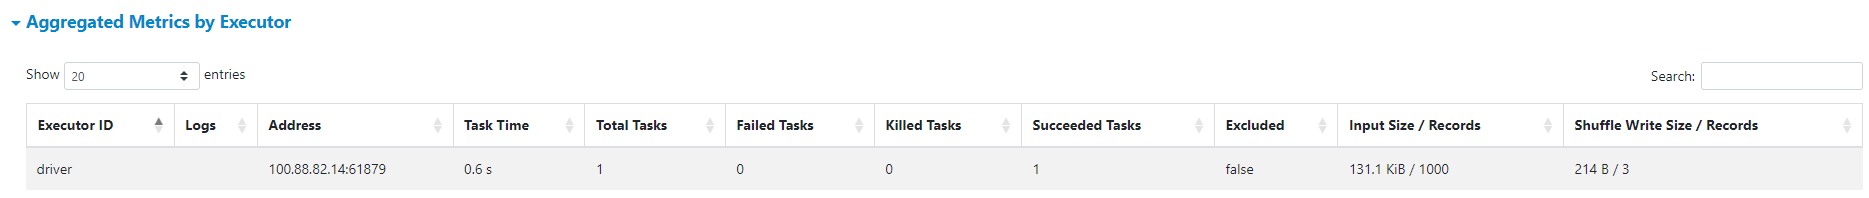
You can observe through the Spark UI that there are
- 1 Task
- Time: 0.6s
- Input Size: 131KiB
- Shuffle Records: 3

In [5]:
test1_groupby = df_test1.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-----+
|event_type|count|
+----------+-----+
|  purchase|   10|
|      view|  987|
|      cart|    3|
+----------+-----+



## Test 2 is 10,000 rows data

In [4]:
# Read CSV file
df_test2 = spark.read.csv(test2, header=True, inferSchema=True)


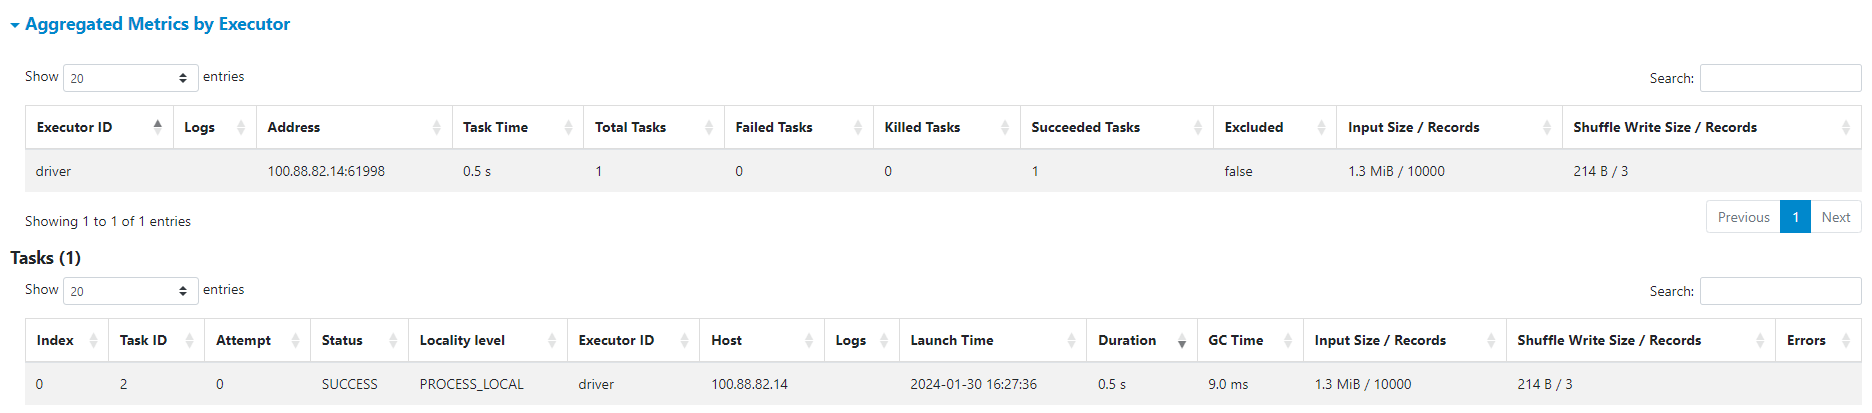
You can observe through the Spark UI that there are
- 1 Task
- Time: 0.5s
- Input Size: 1.3MiB
- Shuffle Records: 3

In [5]:
test2_groupby = df_test2.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-----+
|event_type|count|
+----------+-----+
|  purchase|  118|
|      view| 9785|
|      cart|   97|
+----------+-----+



## Test 3 is 100,000 rows data

In [4]:
# Read CSV file
df_test3 = spark.read.csv(test3, header=True, inferSchema=True)


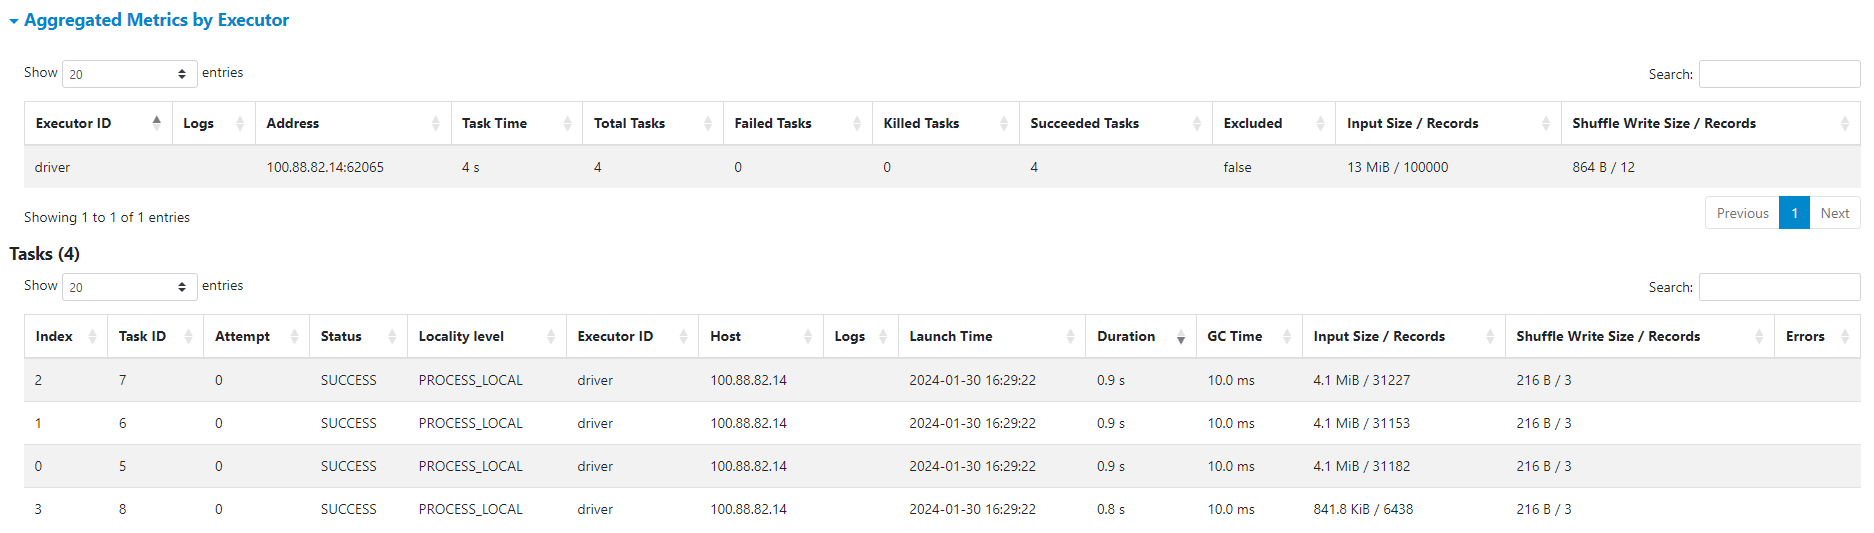
You can observe through the Spark UI that there are
- 4 Task
- Time: 4 s
- Input Size: 13MiB
- Shuffle Records: 12

In [5]:
# Memory Usage
memory = psutil.virtual_memory()
print(f"Memory Usage: {memory.percent}%")

 # Disk I/O
disk_io_start = psutil.disk_io_counters()

test3_groupby = df_test3.groupBy(col("event_type")).agg(count("*").alias("count")).show()


disk_io_end = psutil.disk_io_counters()

read_bytes = disk_io_end.read_bytes - disk_io_start.read_bytes
write_bytes = disk_io_end.write_bytes - disk_io_start.write_bytes

print(f"Read: {read_bytes / 1024 / 1024:.2f} MB, Write: {write_bytes / 1024 / 1024:.2f} MB")

Memory Usage: 73.0%
+----------+-----+
|event_type|count|
+----------+-----+
|  purchase| 1655|
|      view|97130|
|      cart| 1215|
+----------+-----+

Read: 0.17 MB, Write: 0.33 MB


## Test 4 is 1,000,000 rows data

In [4]:
# Read CSV file
df_test4 = spark.read.csv(test4, header=True, inferSchema=True)

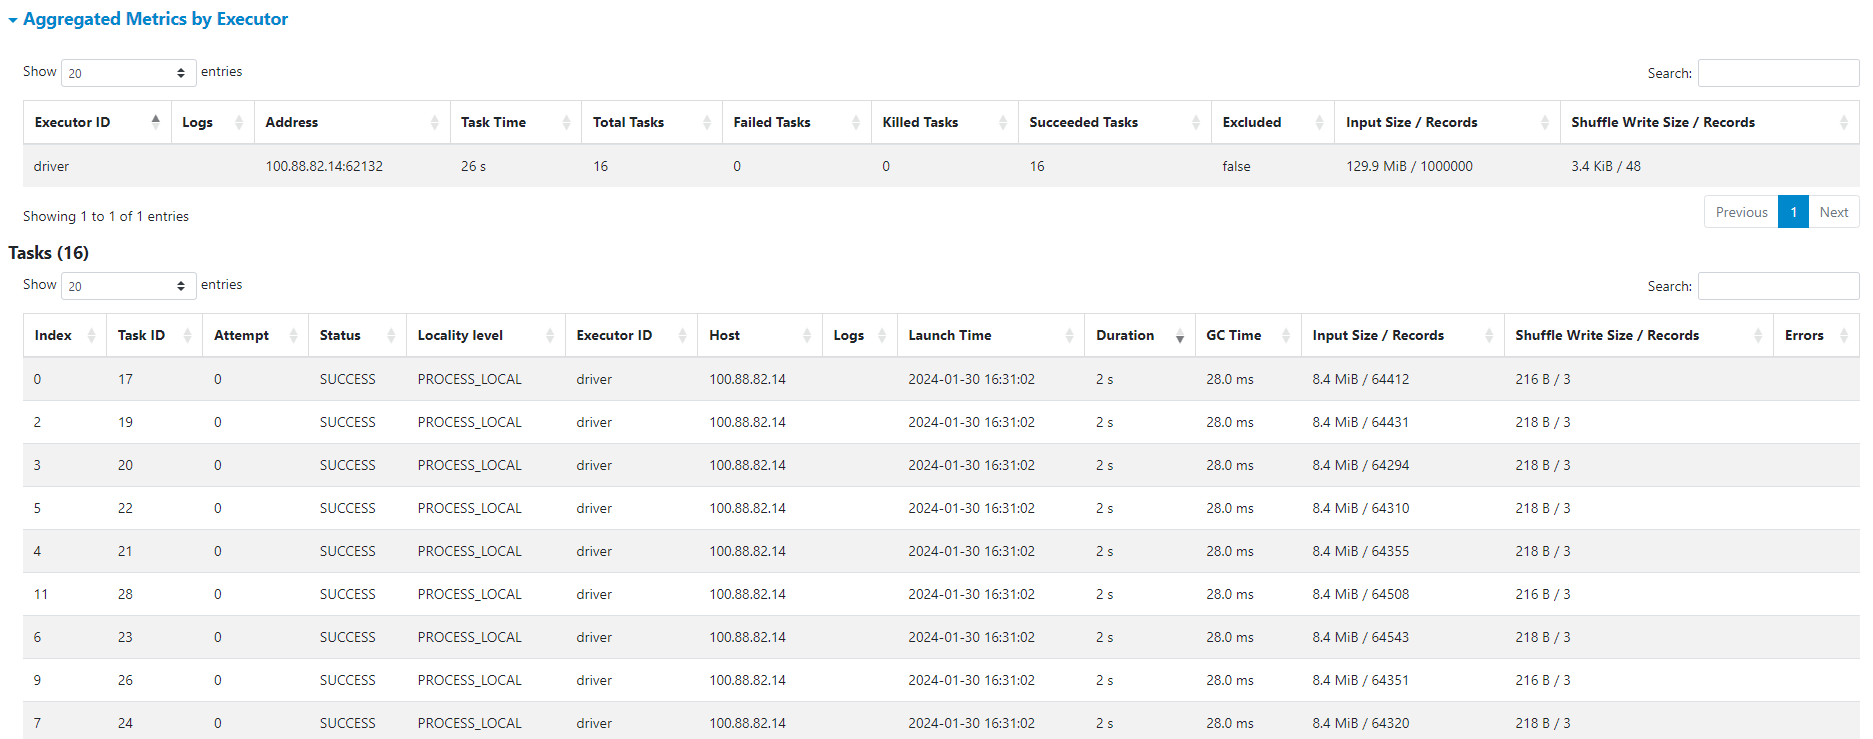
You can observe through the Spark UI that there are
- 16 Task
- Time: 26 s
- Input Size: 129.9MiB
- Shuffle Records: 48

In [5]:
test4_groupby = df_test4.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+------+
|event_type| count|
+----------+------+
|  purchase| 16848|
|      view|968513|
|      cart| 14639|
+----------+------+



## Test 5 is 10,000,000 rows data

In [4]:
# Read CSV file
df_test5 = spark.read.csv(test5, header=True, inferSchema=True)

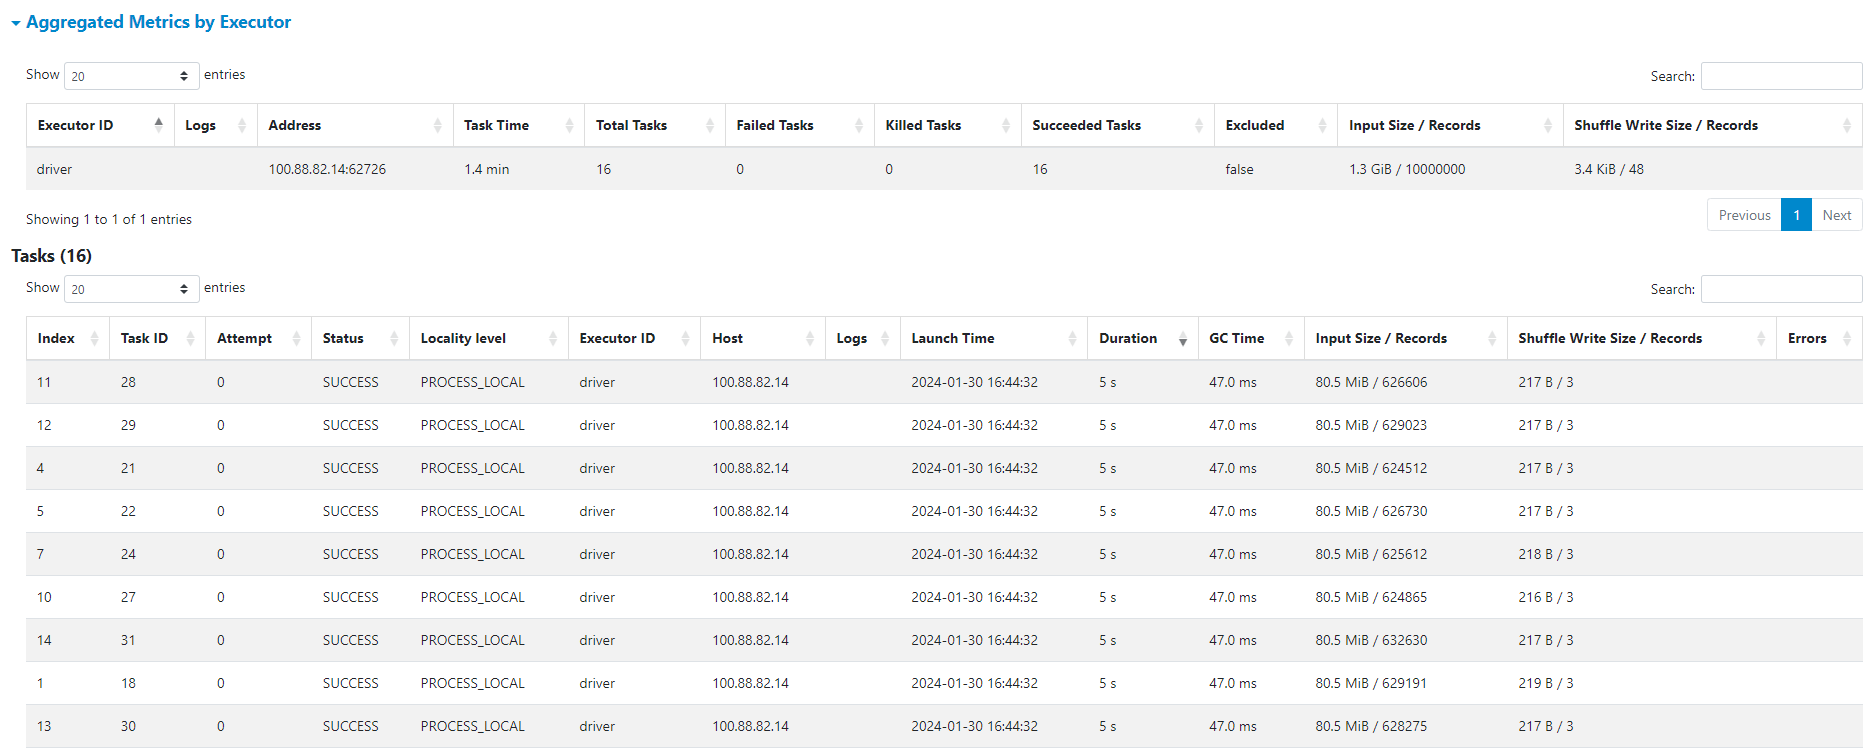
You can observe through the Spark UI that there are
- 16 Task
- Time: 1.4 min
- Input Size: 1.3GiB
- Shuffle Records: 48

In [5]:
test5_groupby = df_test5.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+-------+
|event_type|  count|
+----------+-------+
|  purchase| 172826|
|      view|9627820|
|      cart| 199354|
+----------+-------+



## Test 6 is 20,000,000 rows data

In [4]:
df_test6 = spark.read.csv(test6, header=True, inferSchema=True)

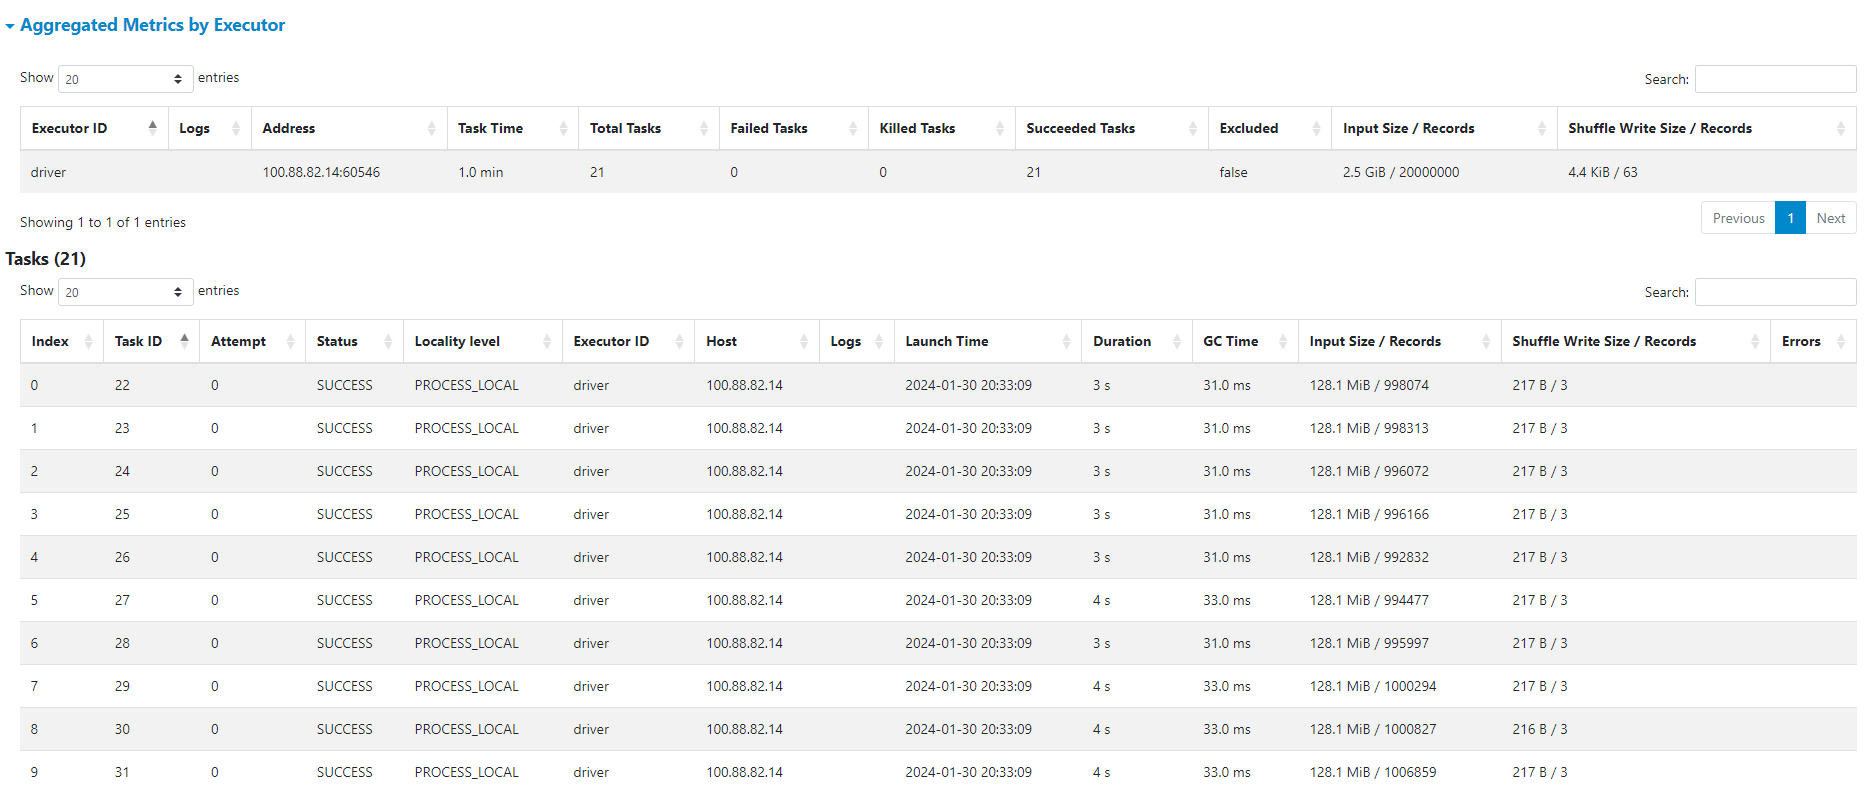
You can observe through the Spark UI that there are
- 21 Task
- Time: 1.0 min
- Input Size: 2.5 GiB
- Shuffle Records: 63

In [5]:
test6_groupby = df_test6.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase|  349700|
|      view|19259848|
|      cart|  390452|
+----------+--------+



## Test 7 is 100,000,000 rows data

In [4]:
df_test7 = spark.read.csv(test7, header=True, inferSchema=True)

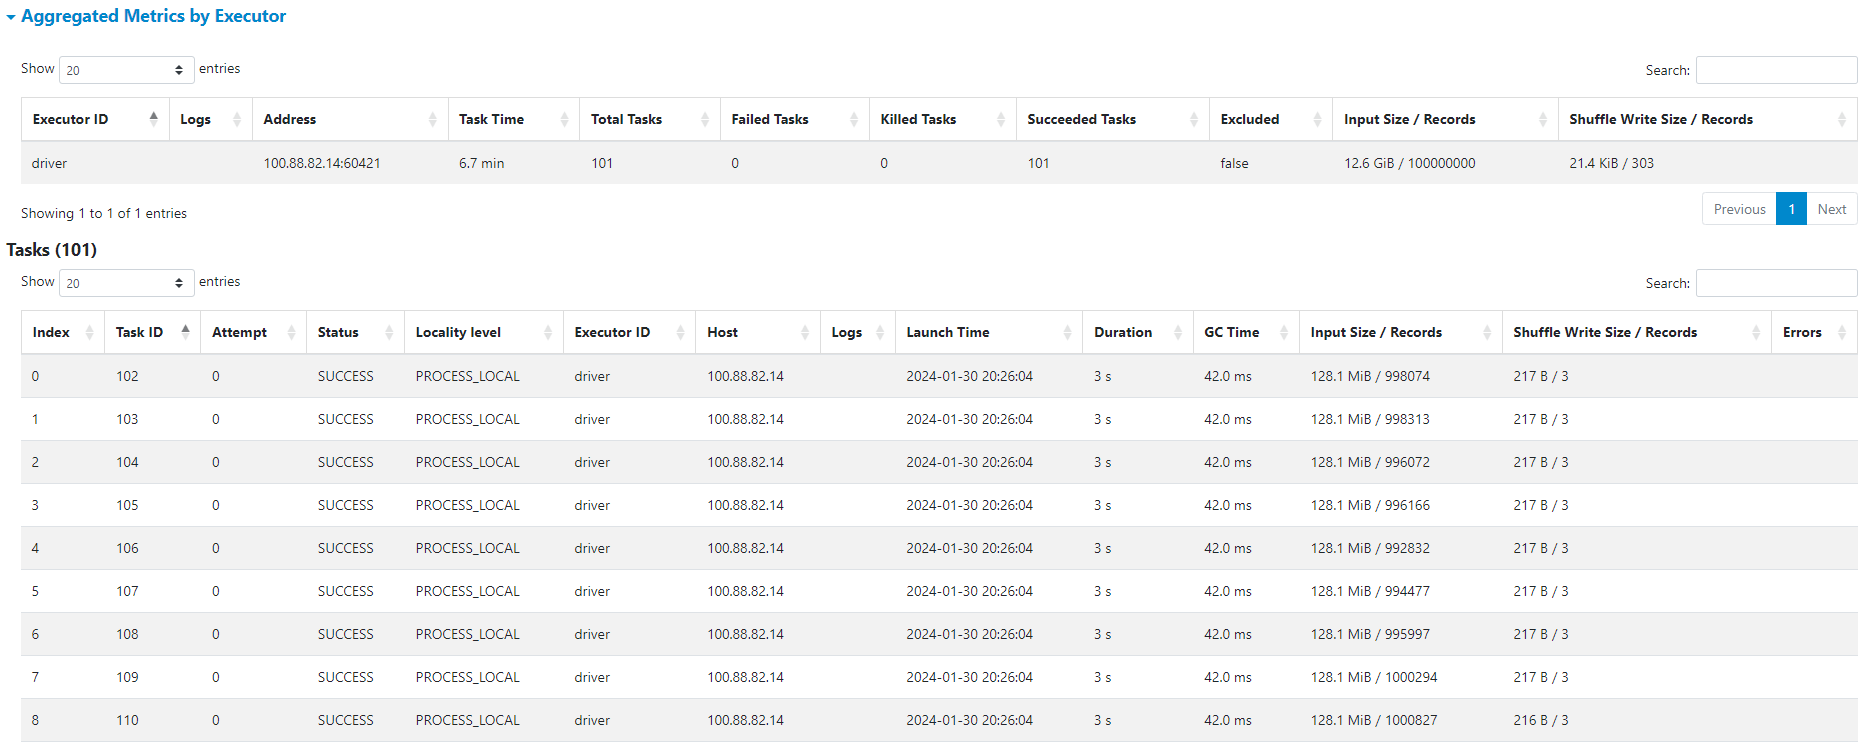
You can observe through the Spark UI that there are
- 101 Task
- Time: 6.7 min
- Input Size: 12.6 GiB
- Shuffle Records: 303

In [6]:
test7_groupby = df_test7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      view|95743263|
|      cart| 2538550|
+----------+--------+



| Test ID | num of Task | rows | seconds/byte | per task input size |
| --- | --- | --- | --- | --- |
| 1 | 1 | 1,000 | 0.6/131.1KiB | 131.1KiB |
| 2 | 1 | 10,000 | 0.5/1.3MiB | 1.3MiB |
| 3 | 4 | 100,000 | 4/13MiB | 4.1MiB |
| 4 | 16 | 1,000,000 | 26/129.9MiB | 8.4MiB |
| 5 | 16 | 10,000,000 | 1.4*60/1.3GiB | 80.5MiB |
| 6 | 21 | 20,000,000 | 1.0*60/2.5GiB | 128.1Mib |
| 7 | 101 | 100,000,000 | 6.7*60/12.6GIB | 128.1Mib |

As the number of rows increases, the per-task input size also increases. This is expected because more data is being processed overall.

We observe that by increasing the number of tasks, the per-task input size can be kept within manageable limits.

In the progression from Test 6 to Test 7, the CPU has 16 cores, indicating it can concurrently handle 16 tasks. [The single partition default](https://spark.apache.org/docs/latest/sql-performance-tuning.html "(128 MB)") is set at 128MB, meaning that each task's input size is approximately 128 MB.Increasing the number of tasks allows the workload to be distributed more evenly across the cores, maintaining optimal performance even as the dataset size increases significantly.

# Hardware Scalability
This section aims to explore the following questions:
- How does the "data" run through the system? Which paths are IO-bound/Memory-bound/CPU bound?
- Which paths are easy/more difficult to scale? 

## Test 8 initialize SparkSession with 4 cores and 16GB of RAM

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .master("local[4]") \
    .getOrCreate()

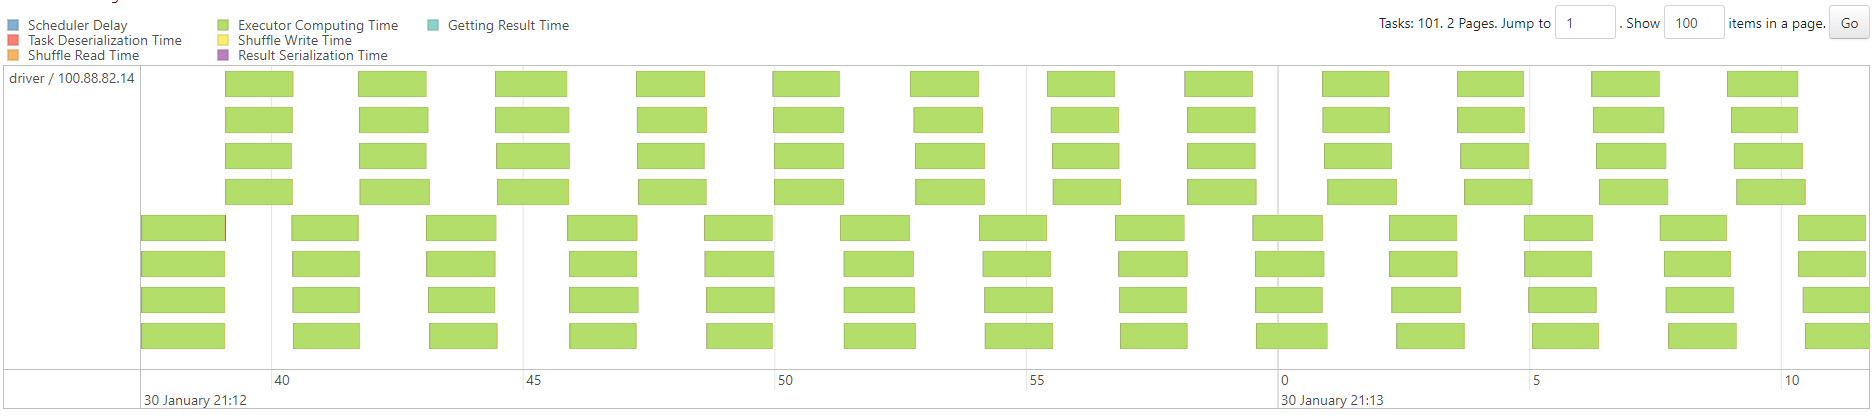

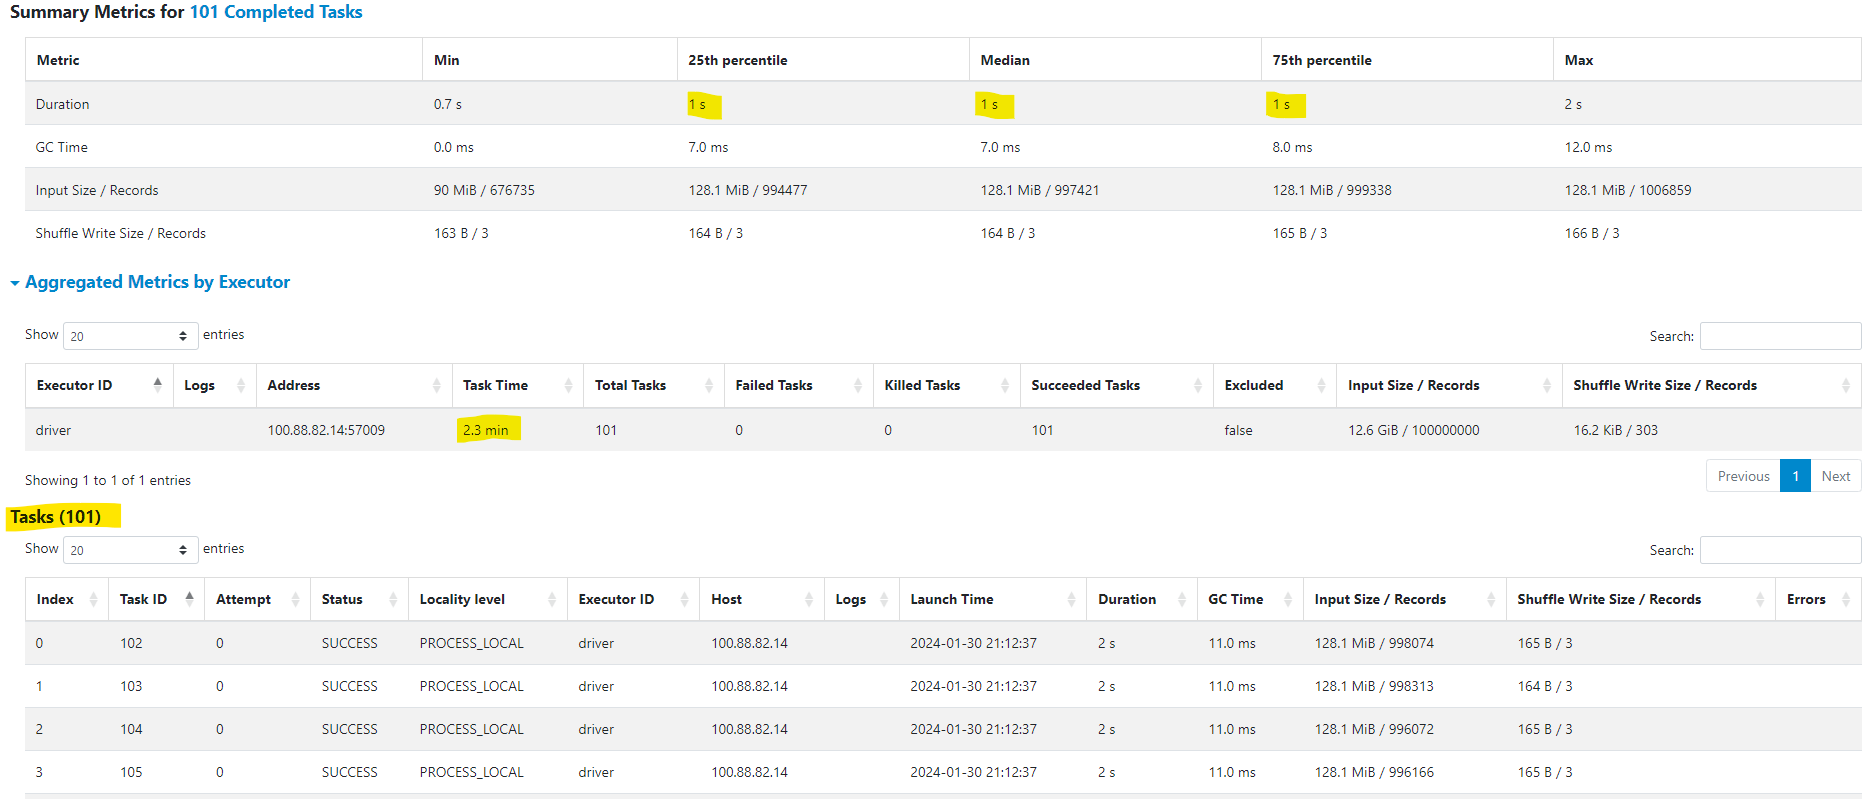
You can observe through the Spark UI that there are
- 101 Task
- Time: 2.3 min
- Input Size: 12.6 GiB
- Shuffle Records: 303

Reading a CSV file into a Spark DataFrame is an IO-bound operation.

In [4]:
# Read CSV file
df_test7 = spark.read.csv(test7, header=True, inferSchema=True)

In [5]:
test7_groupby = df_test7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      cart| 2538550|
|      view|95743263|
+----------+--------+



## Test 9 initialize SparkSession with 16 cores and 16GB of RAM

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[16]") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()
 

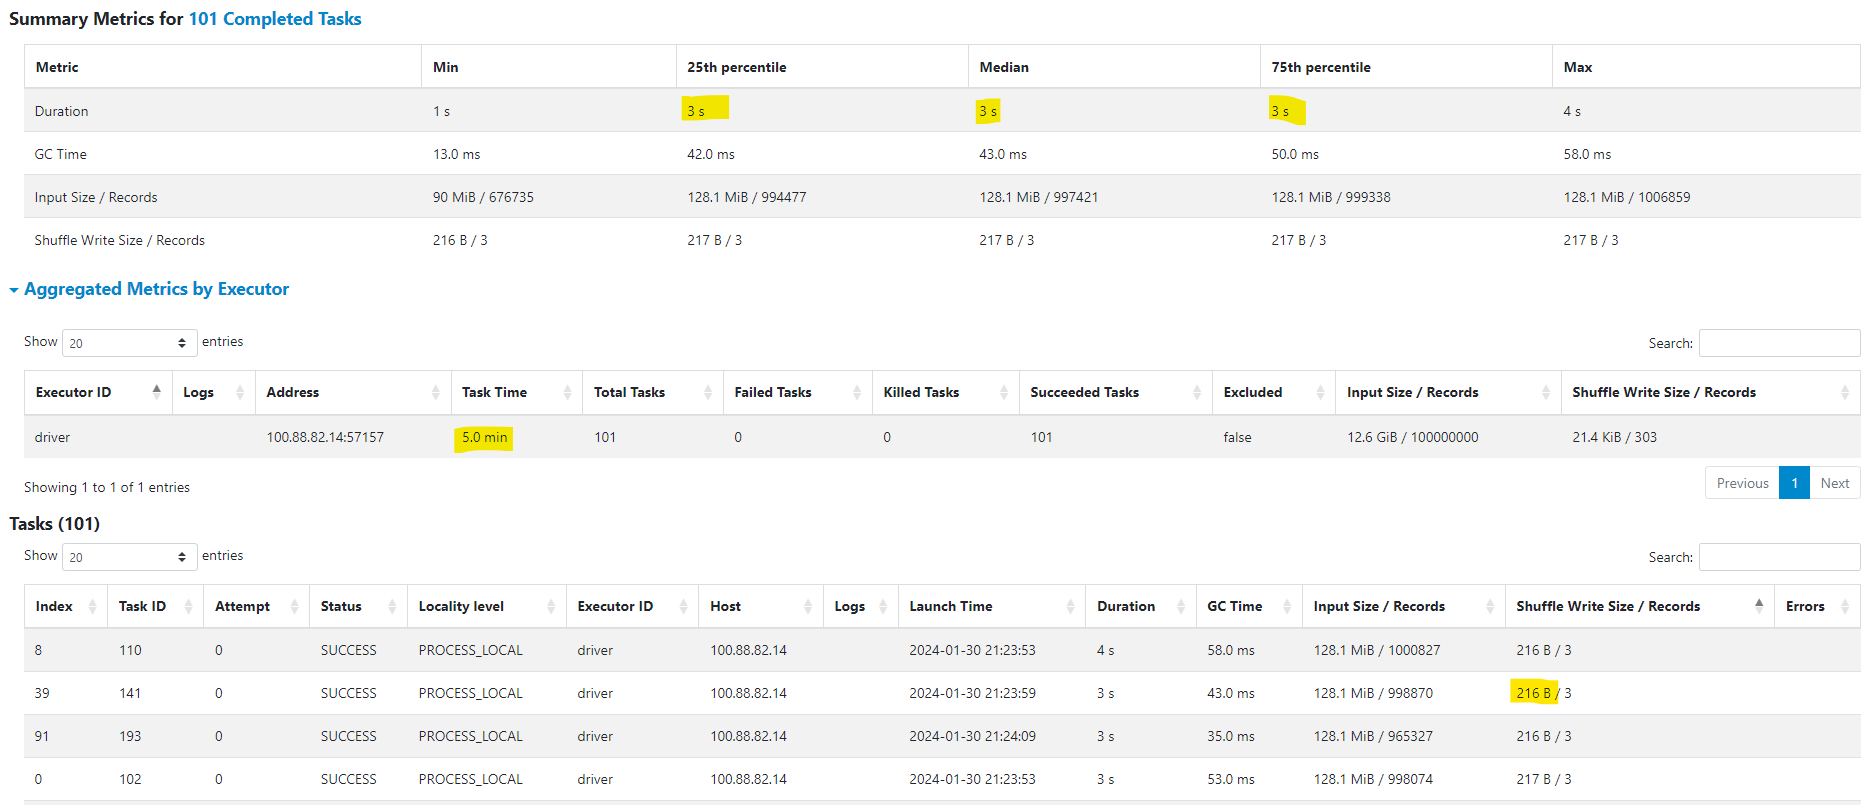
You can observe through the Spark UI that there are
- 101 Task
- Time: 5.0 min
- Input Size: 12.6 GiB
- Shuffle Records: 303

In [4]:
# Read CSV file
df_test7 = spark.read.csv(test7, header=True, inferSchema=True)

In [5]:
test7_groupby = df_test7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      view|95743263|
|      cart| 2538550|
+----------+--------+



## Test 10 initialize SparkSession with 1 cores and 16GB of RAM

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[1]") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()

In [4]:
# Read CSV file
df_test7 = spark.read.csv(test7, header=True, inferSchema=True)

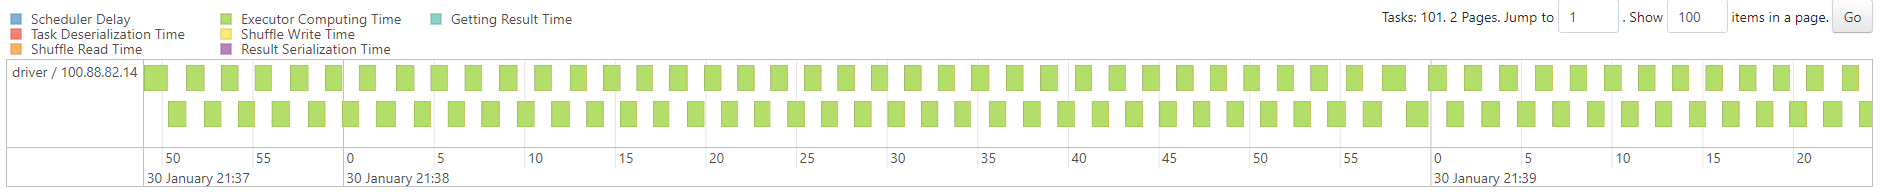

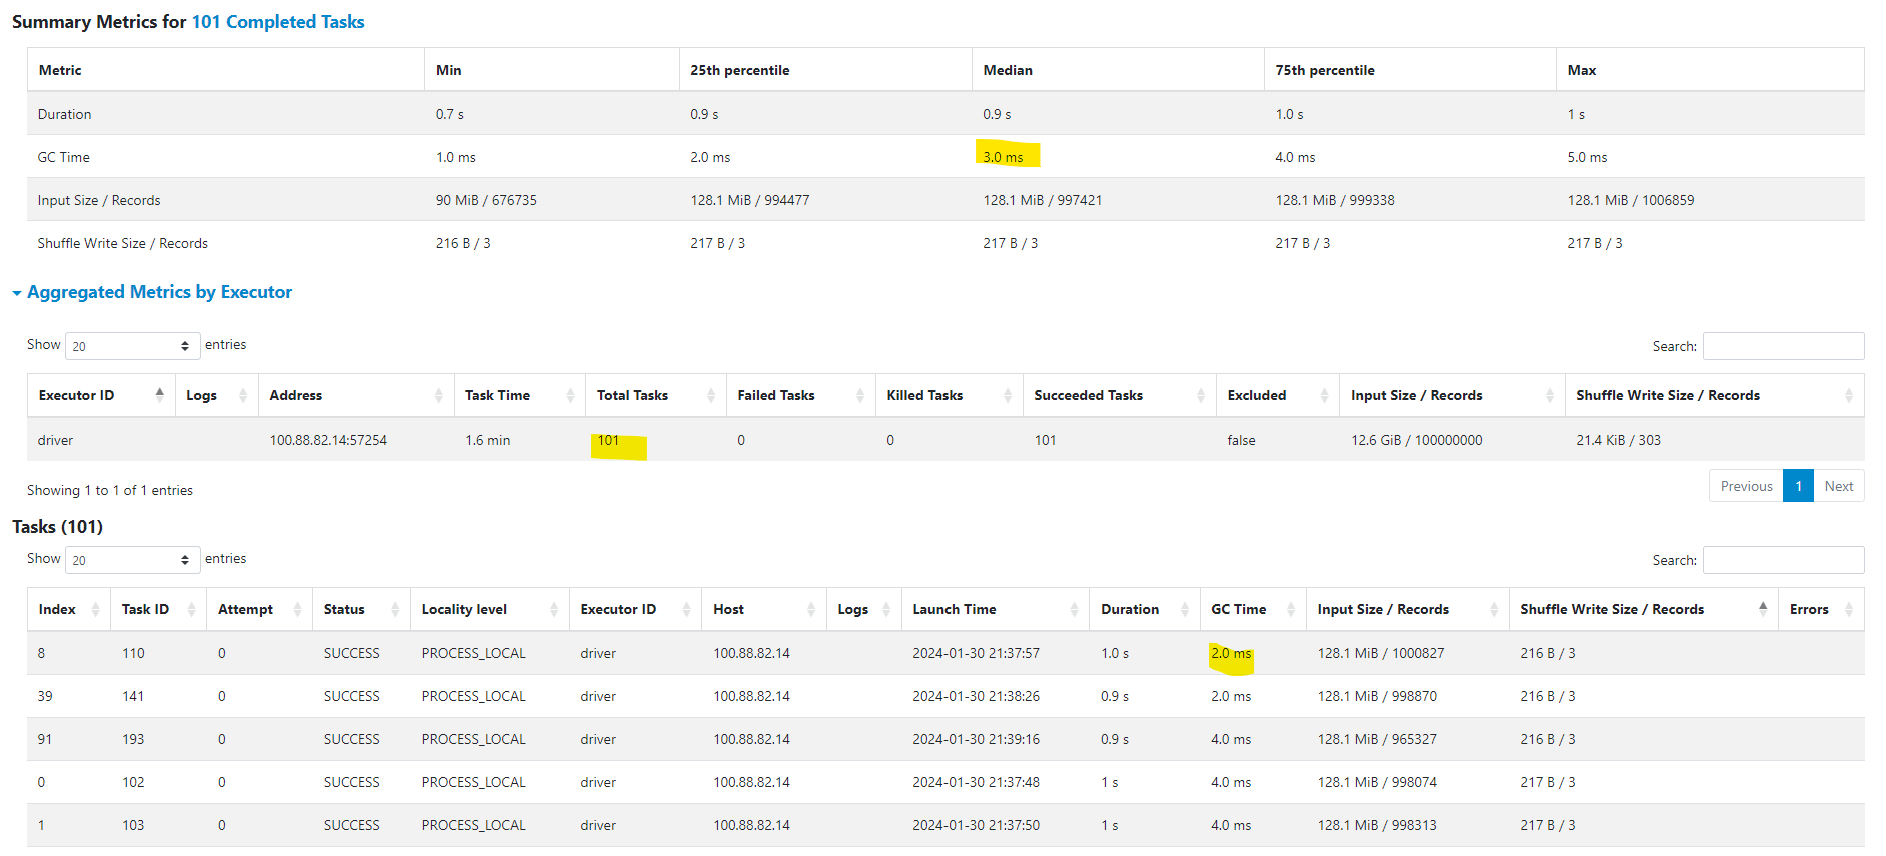

You can observe through the Spark UI that there are
- 101 Task
- Time: 1.6 min
- Input Size: 12.6 GiB
- Shuffle Records: 303

In [5]:
test7_groupby = df_test7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      view|95743263|
|      cart| 2538550|
+----------+--------+



| Test ID | core | ram | num of Task | total time minutes | second / task(Median) | gc time/per task(Median) |
| --- | --- | --- | --- | --- | --- | --- |
| 10 | 1 | 16 | 101 | 1.6 | 0.9 | 3.0 ms |
| 8 | 4 | 16 | 101 | 2.3 | 1 | 7.0 ms |
| 9 | 16 | 16 | 101 | 5.0 | 3 | 43.0 ms |

As the number of cores increases - as observed in tests 8, 9, and 10 - there is a proportional increase in memory demand.  
In local mode, PySpark runs all its tasks in a single JVM process but still utilizes multiple threads for parallel processing, corresponding to the number of cores you allocate. Each core requires memory to operate, and as you increase the number of cores, the memory demand increases. This increased memory demand can lead to more frequent garbage collection as the JVM tries to free up memory.  
This indicates that with more cores, the system might be generating more garbage collection workload, due to increased data shuffle write size which can negatively impact performance.

## Test 11 initialize SparkSession maxPartitionBytes 8 MB  and 16 core

```python
spark.sql.files.maxPartitionBytes
```
We manage memory usage in Spark, and it can influence the memory-bound and instructe Spark to create more, smaller partitions.

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[16]") \
    .config("spark.sql.files.maxPartitionBytes", 8388608) \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.memory", "16g") \
    .getOrCreate()


In [4]:
# Read CSV file
df_test7 = spark.read.csv(test7, header=True, inferSchema=True)

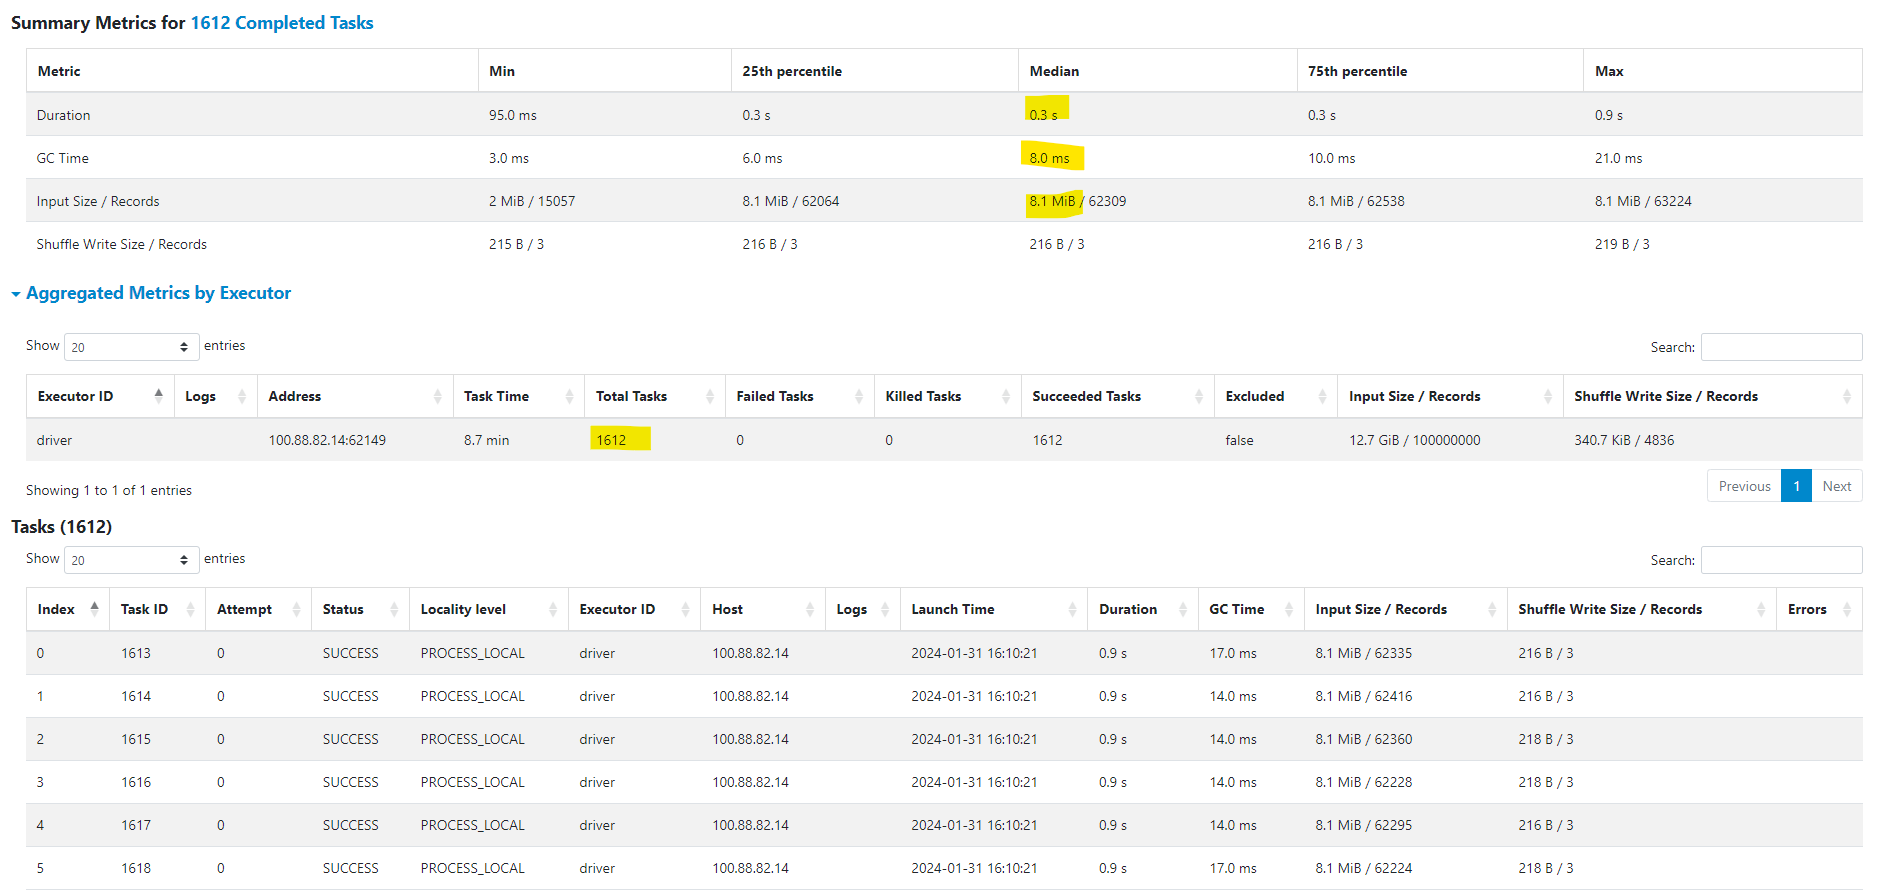
You can observe through the Spark UI that there are
- 1612 Task
- Time: 8.7 min
- Input Size: 12.7 GiB
- Shuffle Records: 4836

In [5]:
test7_groupby = df_test7.groupBy(col("event_type")).agg(count("*").alias("count")).show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase| 1718187|
|      view|95743263|
|      cart| 2538550|
+----------+--------+



| Test ID | num of Task | input size/per task | total time minutes | second / task | gc time/per task(Median) | num of Shuffle |
| --- | --- | --- | --- | --- | --- | --- |
| 11 | 1612 | 8.1 MiB | 8.7 | 0.9 | 17.0 ms | 4836 |
| 9 | 101 | 128.1MiB | 5.0 | 3 | 43.0 ms | 303 |

In Test 11, the smaller size of data per task leads to a larger number of tasks. While the time per task is lower, the overhead associated with managing a higher number of tasks (like gc time/per task and initialization) accumulates, resulting in a longer total time.  
The increased GC time that means handling larger data size per task can lead to more significant memory management overhead.
The number of shuffles is also considerably higher (4836). Shuffling is a resource-intensive operation and having a higher number of shuffles can significantly impact performance, particularly in distributed computing environments.



## Test 12 initialize SparkSession maxPartitionNum 1 and 16 core

In [3]:
spark = SparkSession.builder \
    .appName("eCommerce") \
    .master("local[16]") \
    .config("spark.sql.files.maxPartitionNum", 1) \
    .config("spark.sql.files.maxPartitionBytes", 134217728*128) \
    .getOrCreate()


In [4]:
# Read CSV file
df_test3 = spark.read.csv(test3, header=True, inferSchema=True)

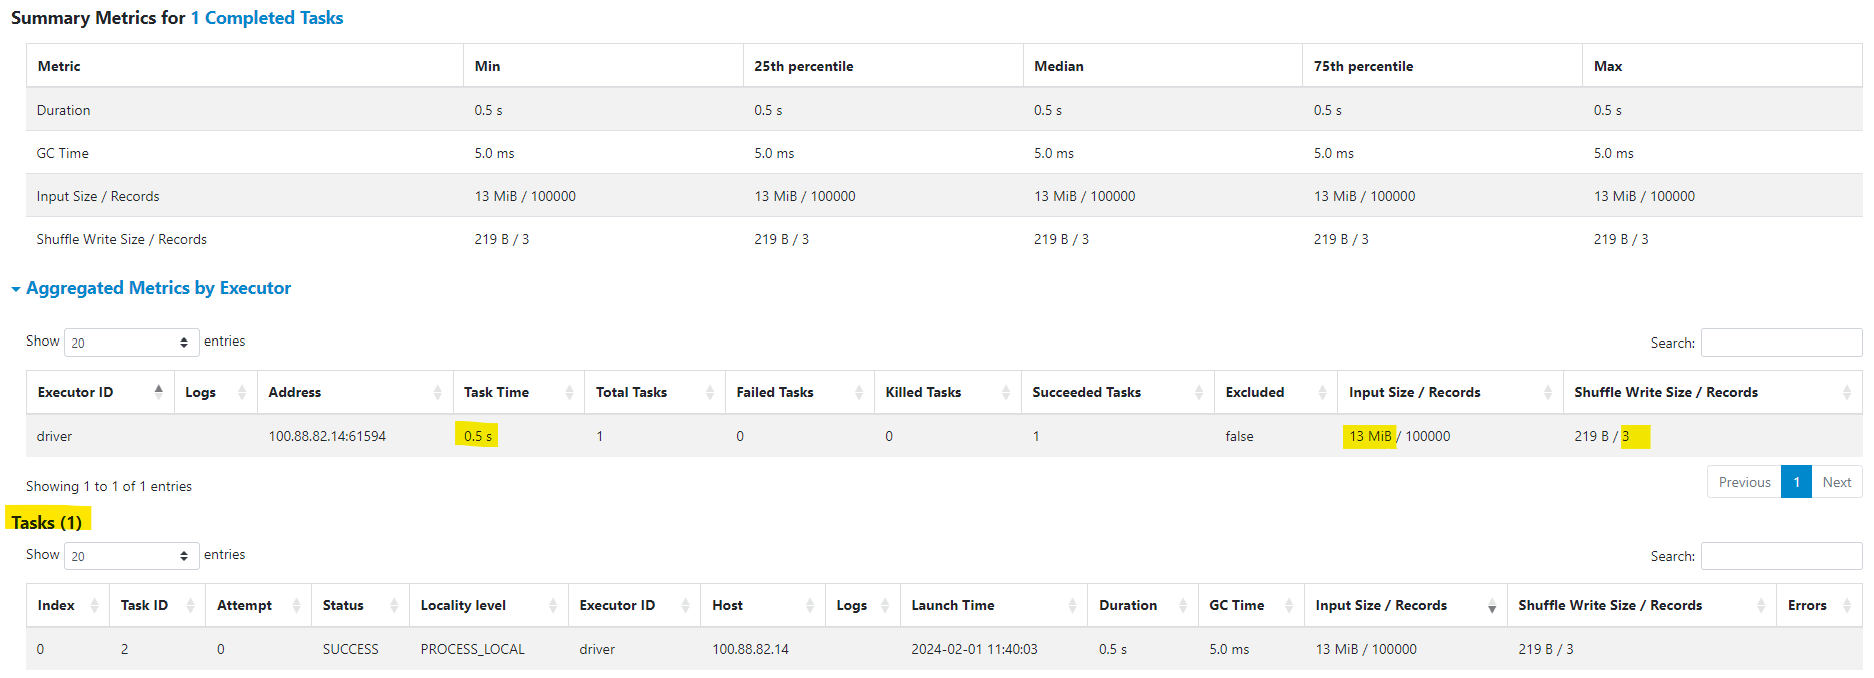

In [5]:
# Memory Usage
memory = psutil.virtual_memory()
print(f"Memory Usage: {memory.percent}%")

 # Disk I/O
disk_io_start = psutil.disk_io_counters()

test3_groupby = df_test3.groupBy(col("event_type")).agg(count("*").alias("count")).show()


disk_io_end = psutil.disk_io_counters()

read_bytes = disk_io_end.read_bytes - disk_io_start.read_bytes
write_bytes = disk_io_end.write_bytes - disk_io_start.write_bytes

print(f"Read: {read_bytes / 1024 / 1024:.2f} MB, Write: {write_bytes / 1024 / 1024:.2f} MB")

Memory Usage: 72.7%
+----------+-----+
|event_type|count|
+----------+-----+
|  purchase| 1655|
|      view|97130|
|      cart| 1215|
+----------+-----+

Read: 0.12 MB, Write: 0.23 MB


| Test ID | input size | maxPartitionNum | num of Task | input size/per task | total time seconds |
| --- | --- | --- | --- | --- | --- |
| 3 | 13Mib | - | 4 | 4.1 MiB | 4 |
| 12 | 13Mib | 1 | 1 | 13Mib | 0.5 |

For small data ,when we have more tasks (as in Test 3), this times of suffle is incurred multiple times, cumulatively adding to the total processing time.  
We observe that less disk I/O is required when processing data in a single task. This could be due to reduced data shuffling and movement between tasks.
